https://www.kaggle.com/code/agileteam/3rd-type2-3-2-baseline

작업형2 기출 유형(심화)
본 문제는 변형한 심화 문제 입니다.
오리지널 3회 기출 유형을 보고 싶은 분은 아래 클래스-커리큘럼 탭에 무료공개(3회 작업형2)로 영상과 데이터셋을 올려놨어요!
https://class101.net/products/467P0ZPH0lVX9FwFBDz7
여행 보험 패키지 상품을 구매할 확률 값을 구하시오
예측할 값(y): TravelInsurance (여행보험 패지지를 구매 했는지 여부 0:구매안함, 1:구매)
평가: roc-auc 평가지표
data: t2-1-train.csv, t2-1-test.csv
제출 형식
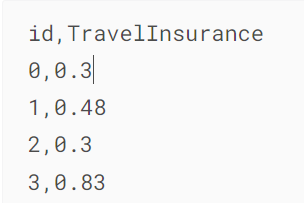

풀이 URL: https://www.kaggle.com/code/agileteam/3rd-type2-3-2-baseline
https://www.kaggle.com/competitions/big-data-analytics-certification/code

In [1]:
import pandas as pd

# 데이터 불러오기
train = pd.read_csv("./t2-1-train.csv")
test =  pd.read_csv("./t2-1-test.csv")

In [2]:
# 1) 간단한 EDA 
train.head()

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,10000,28,Private Sector/Self Employed,Yes,1250000.0,6,1,No,No,0
1,10001,31,Private Sector/Self Employed,Yes,1250000.0,7,1,No,No,0
2,10002,29,Private Sector/Self Employed,Yes,1200000.0,7,0,No,No,1
3,10003,33,Government Sector,Yes,650000.0,6,1,No,No,1
4,10004,28,Private Sector/Self Employed,Yes,800000.0,6,0,No,Yes,1


In [3]:
test.head()

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0,32,Government Sector,Yes,650000.0,5,0,No,No
1,1,27,Government Sector,Yes,500000.0,5,0,No,No
2,2,32,Government Sector,Yes,350000.0,2,0,No,No
3,3,26,Private Sector/Self Employed,Yes,1400000.0,6,0,No,Yes
4,4,27,Private Sector/Self Employed,No,350000.0,3,0,No,No


In [4]:
print(train.shape, test.shape)

(1490, 10) (497, 9)


In [5]:
train.describe(include="object")

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1490,1490,1490,1490
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1056,1270,1175,1209


In [6]:
test.describe(include="object")
# unique 가 2,3개 이므로 그냥 버리기에는 너무 아까워요..
# 거기에 중요한 것은 "Employment Type"은 train에서는 2개인데, 
# test에서는 3개에요..이거 중요해요. 

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,497,497,497,497
unique,3,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,360,422,395,398


In [7]:
# 결측치 확인
train.isnull().sum()

id                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           4
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [8]:
test.isnull().sum()

id                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           3
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

In [9]:
# 목적변수 확인 -> 균형 잡혔는지...
train['TravelInsurance'].value_counts()

0    965
1    525
Name: TravelInsurance, dtype: int64

데이터 전처리 

In [10]:
# 초보자들에게는 데이터가 변경되기 전에 이를 복사해서 사용하기를 권장함 
train2 = train 
test2 = test 

In [11]:
# 결측치 처리
train2['AnnualIncome'] = train2['AnnualIncome'].fillna(train2['AnnualIncome'].mean())
test2['AnnualIncome'] =  test2['AnnualIncome'].fillna(test2['AnnualIncome'].mean())

In [12]:
 # target값 변수에 옮기기
target = train2.pop('TravelInsurance')

In [13]:
# 이번에는 범주형 변수를 버리지 말고, Label Encoding 해 봅시다. 
# 그런데, 이번에는 "Employment Type" 변수의 level이 train은 2, test는 3이라 
# 각각에서 라벨 인코딩을 하면 총 변수의 갯수가 달라짐 
# 따라서, train과 test 를 하나로 합쳐서 label encoding 을 해야 함 !!! 

In [14]:
df2 = pd.concat([train2, test2])
print(train2.shape, test2.shape, df2.shape)

(1490, 9) (497, 9) (1987, 9)


In [15]:
# 레이블 인코딩을 반복문으로 한꺼번에 처리하는 방법인데..이렇게 어렵게 하지 말고..
# from sklearn.preprocessing import LabelEncoder

# cols = df2.select_dtypes(include="object").columns
# le = LabelEncoder()

# for col in cols:
#     df2[col] = le.fit_transform(df2[col])

우리가 배웠던 쉬운코드로 기억합시다. 
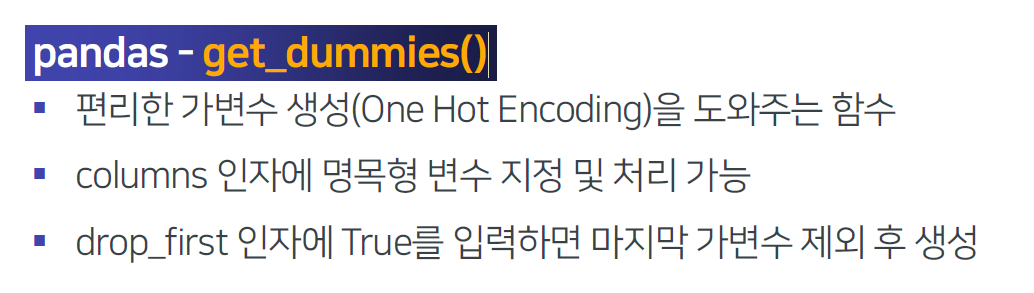
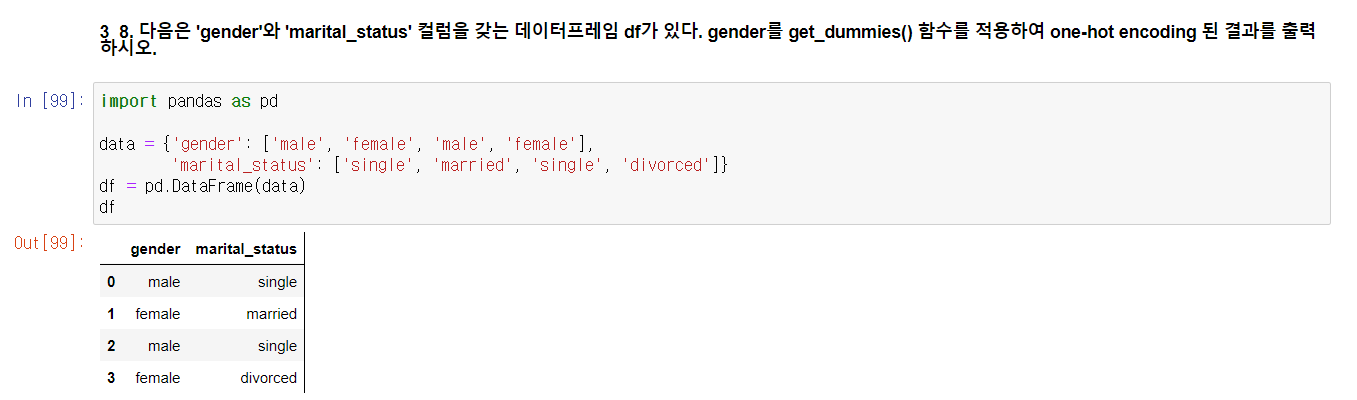
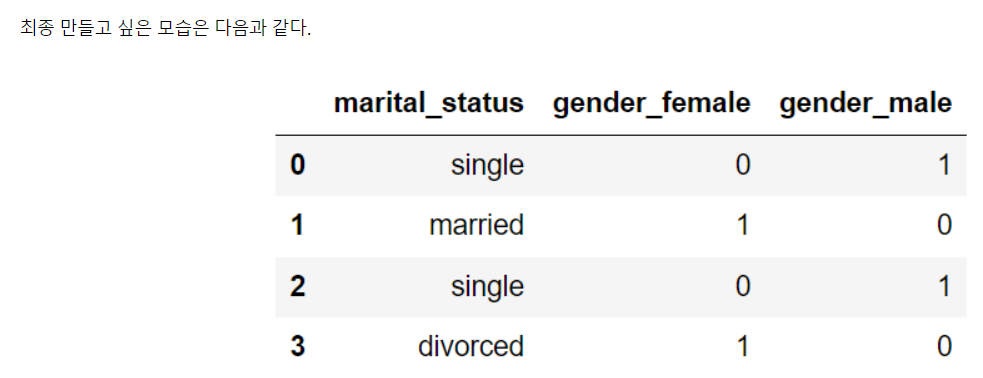
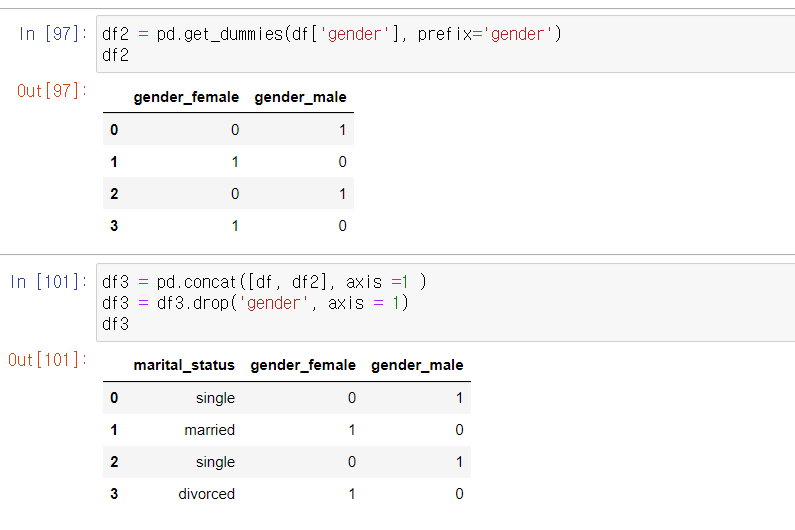

In [19]:
df2.describe(include = "object")

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,3,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1416,1692,1570,1607


In [20]:
# "Employment Type" "GraduateOrNot" "FrequentFlyer" "EverTravelledAbroad"
# 4개의 object를 하나씩 수행해서 합치면 됨..

tmp1 = pd.get_dummies(df2["Employment Type"], prefix = 'EmploymentType', 
                      drop_first = True # 이걸 넣었을 때와 뺐을 때의 차이를 알아야 하고, True 로 넣는게 더 좋다는 게 정설 (다중공선성)
                     )
tmp1.head()

,EmploymentType_Government Sector,EmploymentType_Private Sector/Self Employed
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [33]:
tmp2 = pd.get_dummies(df2["GraduateOrNot"], prefix = 'GraduateOrNot', drop_first = True)
tmp2.head()

,GraduateOrNot_Yes
0,1
1,1
2,1
3,1
4,1


In [34]:
tmp2.value_counts()

GraduateOrNot_Yes
1                    1692
0                     295
dtype: int64

In [35]:
tmp3 = pd.get_dummies(df2["FrequentFlyer"], prefix = 'FrequentFlyer', drop_first = True)
tmp3.head()

,FrequentFlyer_Yes
0,0
1,0
2,0
3,0
4,0


In [36]:
tmp4 = pd.get_dummies(df2["EverTravelledAbroad"], prefix = 'EverTravelledAbroad', drop_first = True)
tmp4.head()

,EverTravelledAbroad_Yes
0,0
1,0
2,0
3,0
4,1


In [39]:
df3 = df2.drop(['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'], axis = 1)
df3 = pd.concat([df3, tmp1, tmp2, tmp3, tmp4], axis = 1)
print(df3.shape)
df3.head()

(1987, 10)


,id,Age,AnnualIncome,FamilyMembers,ChronicDiseases,EmploymentType_Government Sector,EmploymentType_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,10000,28,1250000.0,6,1,0,1,1,0,0
1,10001,31,1250000.0,7,1,0,1,1,0,0
2,10002,29,1200000.0,7,0,0,1,1,0,0
3,10003,33,650000.0,6,1,1,0,1,0,0
4,10004,28,800000.0,6,0,0,1,1,0,1


In [42]:
# 이렇게 합쳐서 전처리 한 다음..다시 train/test 원복 필요 
train2 = df3[:train.shape[0]].copy()
test2  =  df3[train.shape[0]:].copy()

print(train2.shape, test2.shape)

(1490, 10) (497, 10)


In [44]:
# 일단 train에서 학습하고 평가하자.. -> train/test hold out.. cv 는 다음주에..
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(random_state=2022)
model.fit(train2, target)
pred_train = model.predict_proba(train2)
roc_auc_score(target, pred_train[:,1])

1.0

In [45]:
# 예측, 제출 

pred_test = model.predict_proba(test2)
print(pred_test.shape)

(497, 2)


In [47]:
pred_test

array([[0.7 , 0.3 ],
       [0.52, 0.48],
       [0.77, 0.23],
       [0.18, 0.82],
       [0.79, 0.21],
       [0.18, 0.82],
       [0.46, 0.54],
       [0.81, 0.19],
       [0.3 , 0.7 ],
       [0.69, 0.31],
       [0.5 , 0.5 ],
       [0.64, 0.36],
       [0.72, 0.28],
       [0.75, 0.25],
       [0.19, 0.81],
       [0.8 , 0.2 ],
       [0.78, 0.22],
       [0.69, 0.31],
       [0.71, 0.29],
       [0.76, 0.24],
       [0.78, 0.22],
       [0.85, 0.15],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.64, 0.36],
       [0.28, 0.72],
       [0.24, 0.76],
       [0.82, 0.18],
       [0.15, 0.85],
       [0.27, 0.73],
       [0.72, 0.28],
       [0.8 , 0.2 ],
       [0.73, 0.27],
       [0.39, 0.61],
       [0.77, 0.23],
       [0.44, 0.56],
       [0.77, 0.23],
       [0.72, 0.28],
       [0.18, 0.82],
       [0.82, 0.18],
       [0.62, 0.38],
       [0.84, 0.16],
       [0.53, 0.47],
       [0.72, 0.28],
       [0.18, 0.82],
       [0.66, 0.34],
       [0.2 , 0.8 ],
       [0.71,

In [50]:
submit = pd.DataFrame()
submit['id'] = test['id']
submit['TravelInsurance'] = pred_test[:,1]

submit.head()

,id,TravelInsurance
0,0,0.30
1,1,0.48
2,2,0.23
3,3,0.82
4,4,0.21


In [51]:
submit.to_csv("2022.csv", index=False)
pd.read_csv("2022.csv").head()

,id,TravelInsurance
0,0,0.30
1,1,0.48
2,2,0.23
3,3,0.82
4,4,0.21


In [52]:
# 이렇게 한 다음.. 단순 확인 코드 제거하여 정리해 보면..

import pandas as pd

# 데이터 불러오기
train = pd.read_csv("./t2-1-train.csv")
test =  pd.read_csv("./t2-1-test.csv")

train2 = train 
test2 = test 

# 결측치 처리
train2['AnnualIncome'] = train2['AnnualIncome'].fillna(train2['AnnualIncome'].mean())
test2['AnnualIncome'] =  test2['AnnualIncome'].fillna(test2['AnnualIncome'].mean())

 # target값 변수에 옮기기
target = train2.pop('TravelInsurance')

df2 = pd.concat([train2, test2])

tmp1 = pd.get_dummies(df2["Employment Type"], prefix = 'EmploymentType', drop_first = True )
tmp2 = pd.get_dummies(df2["GraduateOrNot"], prefix = 'GraduateOrNot', drop_first = True)
tmp3 = pd.get_dummies(df2["FrequentFlyer"], prefix = 'FrequentFlyer', drop_first = True)
tmp4 = pd.get_dummies(df2["EverTravelledAbroad"], prefix = 'EverTravelledAbroad', drop_first = True)

df3 = df2.drop(['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'], axis = 1)
df3 = pd.concat([df3, tmp1, tmp2, tmp3, tmp4], axis = 1)

train2 = df3[:train.shape[0]].copy()
test2  =  df3[train.shape[0]:].copy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(random_state=2022)
model.fit(train2, target)

pred_test = model.predict_proba(test2)

submit = pd.DataFrame()
submit['id'] = test['id']
submit['TravelInsurance'] = pred_test[:,1]

submit.to_csv("2022.csv", index=False)
pd.read_csv("2022.csv").head()

,id,TravelInsurance
0,0,0.30
1,1,0.48
2,2,0.23
3,3,0.82
4,4,0.21
